In [2]:
import numpy as np
import sympy as sp


tau_fps, sigma_x, sigma_z = sp.symbols(r'\tau_\mathrm{fps}, sigma_x, sigma_z')


sigma_xz = sp.Matrix([[sigma_x, tau_fps],
                     [tau_fps, sigma_z]])
sigma_xz

Matrix([
[          sigma_x, \tau_\mathrm{fps}],
[\tau_\mathrm{fps},           sigma_z]])

In [3]:
P_xz, D_xz = sigma_xz.diagonalize()
P_xz

Matrix([
[-2*\tau_\mathrm{fps}/(sigma_x - sigma_z + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)), 2*\tau_\mathrm{fps}/(-sigma_x + sigma_z + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2))],
[                                                                                                                    1,                                                                                                                     1]])

In [4]:
D_xz

Matrix([
[sigma_x/2 + sigma_z/2 - sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)/2,                                                                                                    0],
[                                                                                                   0, sigma_x/2 + sigma_z/2 + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)/2]])

In [5]:
theta_xz = sp.atan( sp.simplify(-P_xz[0,0] / P_xz[1,0]))
theta_xz

atan(2*\tau_\mathrm{fps}/(sigma_x - sigma_z + sqrt(4*\tau_\mathrm{fps}**2 + sigma_x**2 - 2*sigma_x*sigma_z + sigma_z**2)))

In [6]:
get_theta_xz = sp.lambdify((tau_fps, sigma_x, sigma_z), theta_xz)
get_theta_xz

<function _lambdifygenerated(Dummy_39, sigma_x, sigma_z)>

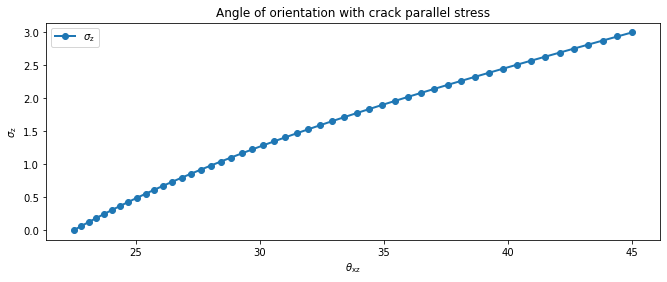

In [7]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

f_ct_val = 3
sig_x = f_ct_val
eta = 0.5
tau_xx = eta * f_ct_val
sigma_z = np.linspace(0, 3, 50)
theta_xz = get_theta_xz(tau_xx, sig_x, sigma_z)

ax1.plot(theta_xz * 180/ np.pi,  sigma_z, 'o-', lw= 2, label = r'$\sigma_{\mathrm{z}}}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{z}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Angle of orientation with crack parallel stress.pdf")

In [8]:
f_ct_val = 3
sig_x_num = 10
sig_x = np.linspace(0,3, sig_x_num)
eta = 0.2
tau_xx = eta * f_ct_val
sig_z_num = 3
sigma_z = np.linspace(0, 3, sig_z_num)
theta = np.zeros([sig_x_num, sig_z_num])
for j in  range(len(sigma_z)):
    print('sigma_z =', sigma_z[j])
    for i in range(len(sig_x)):
        print('sig_x =', sig_x[i])
        theta_xz = get_theta_xz(tau_xx, sig_x[i], sigma_z[j])
        theta[i, j] = theta_xz
print(theta)

sigma_z = 0.0
sig_x = 0.0
sig_x = 0.3333333333333333
sig_x = 0.6666666666666666
sig_x = 1.0
sig_x = 1.3333333333333333
sig_x = 1.6666666666666665
sig_x = 2.0
sig_x = 2.333333333333333
sig_x = 2.6666666666666665
sig_x = 3.0
sigma_z = 1.5
sig_x = 0.0
sig_x = 0.3333333333333333
sig_x = 0.6666666666666666
sig_x = 1.0
sig_x = 1.3333333333333333
sig_x = 1.6666666666666665
sig_x = 2.0
sig_x = 2.333333333333333
sig_x = 2.6666666666666665
sig_x = 3.0
sigma_z = 3.0
sig_x = 0.0
sig_x = 0.3333333333333333
sig_x = 0.6666666666666666
sig_x = 1.0
sig_x = 1.3333333333333333
sig_x = 1.6666666666666665
sig_x = 2.0
sig_x = 2.333333333333333
sig_x = 2.6666666666666665
sig_x = 3.0
[[0.78539816 1.23342586 1.38054314]
 [0.64992474 1.17105546 1.35936936]
 [0.53184891 1.088892   1.33329095]
 [0.43802903 0.98279372 1.30058658]
 [0.36640755 0.85440118 1.2587848 ]
 [0.31201153 0.71639515 1.20438878]
 [0.27020975 0.5880026  1.1327673 ]
 [0.23750538 0.48190433 1.03894742]
 [0.21142696 0.39974087 0.92087159]
 [0.190

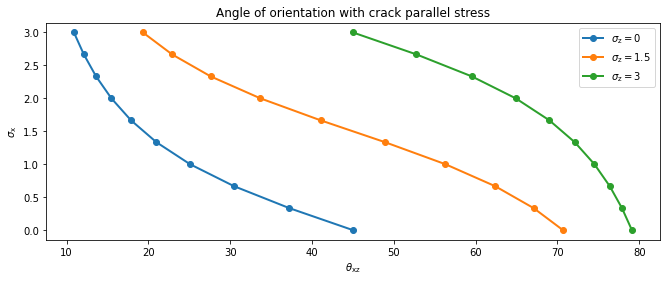

In [9]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(theta[:,0] * 180/ np.pi,  sig_x, 'o-',lw= 2, label = r'$\sigma_{\mathrm{z}} = 0}$')
ax1.plot(theta[:,1] * 180/ np.pi,  sig_x, 'o-',lw= 2, label = r'$\sigma_{\mathrm{z}} = 1.5}$')
ax1.plot(theta[:,2] * 180/ np.pi,  sig_x, 'o-',lw= 2, label = r'$\sigma_{\mathrm{z}} = 3}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{x}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Angle of orientation with crack parallel stress_sig_x.pdf")

In [10]:
f_ct_val = 3
tau_fpz_num = 10
eta = 0.5
tau_fpz = np.linspace(0.1,eta * f_ct_val, sig_x_num)
sig_x = f_ct_val
sig_z_num = 3
sigma_z = np.linspace(0, 3, sig_z_num)
theta = np.zeros([tau_fpz_num, sig_z_num])
for j in  range(len(sigma_z)):
    print('sigma_z =', sigma_z[j])
    for i in range(len(tau_fpz)):
        print('tau_fpz =', tau_fpz[i])
        theta_xz = get_theta_xz(tau_fpz[i], sig_x, sigma_z[j])
        theta[i, j] = theta_xz
print(theta)

sigma_z = 0.0
tau_fpz = 0.1
tau_fpz = 0.25555555555555554
tau_fpz = 0.4111111111111111
tau_fpz = 0.5666666666666667
tau_fpz = 0.7222222222222222
tau_fpz = 0.8777777777777778
tau_fpz = 1.0333333333333334
tau_fpz = 1.188888888888889
tau_fpz = 1.3444444444444446
tau_fpz = 1.5
sigma_z = 1.5
tau_fpz = 0.1
tau_fpz = 0.25555555555555554
tau_fpz = 0.4111111111111111
tau_fpz = 0.5666666666666667
tau_fpz = 0.7222222222222222
tau_fpz = 0.8777777777777778
tau_fpz = 1.0333333333333334
tau_fpz = 1.188888888888889
tau_fpz = 1.3444444444444446
tau_fpz = 1.5
sigma_z = 3.0
tau_fpz = 0.1
tau_fpz = 0.25555555555555554
tau_fpz = 0.4111111111111111
tau_fpz = 0.5666666666666667
tau_fpz = 0.7222222222222222
tau_fpz = 0.8777777777777778
tau_fpz = 1.0333333333333334
tau_fpz = 1.188888888888889
tau_fpz = 1.3444444444444446
tau_fpz = 1.5
[[0.03328408 0.06627577 0.78539816]
 [0.08437505 0.16420117 0.78539816]
 [0.13375259 0.25071017 0.78539816]
 [0.18060188 0.3235236  0.78539816]
 [0.22436167 0.38326624 0.78539816

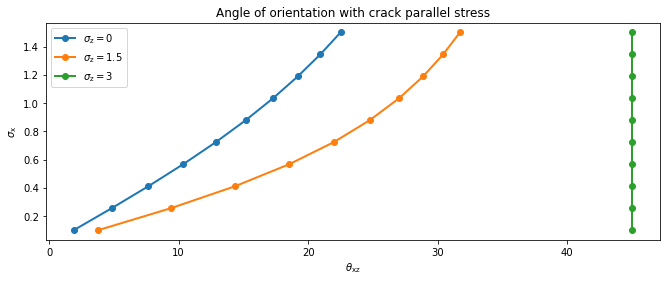

In [11]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(theta[:,0] * 180/ np.pi,  tau_fpz, 'o-',lw= 2, label = r'$\sigma_{\mathrm{z}} = 0}$')
ax1.plot(theta[:,1] * 180/ np.pi,  tau_fpz, 'o-',lw= 2, label = r'$\sigma_{\mathrm{z}} = 1.5}$')
ax1.plot(theta[:,2] * 180/ np.pi,  tau_fpz, 'o-',lw= 2, label = r'$\sigma_{\mathrm{z}} = 3}$')
ax1.set_xlabel(r'$\theta_{\mathrm{xz}}$'); ax1.set_ylabel(r'$\sigma_{\mathrm{x}}$');
ax1.set_title(r'Angle of orientation with crack parallel stress')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Angle of orientation with crack parallel stress_tau_fpz.pdf")